## (1) Set Environment

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.system('git clone https://github.com/VlOIET/20242R0136COSE47402.git')

0

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="XM87RY8f7oIaykIwsDoU")
project = rf.workspace("food-recipe-ingredient-images-0gnku").project("food-ingredients-dataset")
version = project.version(4)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to FOOD-INGREDIENTS-dataset-4 in yolov8:: 100%|██████████| 19480/19480 [00:03<00:00, 6233.18it/s]


In [4]:
pip install -U ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 20.7 MB/s eta 0:00:00


In [5]:
#Environment
DEVICE = "cuda"
DATA_PATH = "/content/FOOD-INGREDIENTS-dataset-4/data.yaml"

#Train
BATCH_SIZE = 32
EPOCHS = 70
LR = 0.001

## (2) Training

In [6]:
from ultralytics import YOLO

model = YOLO('yolov8m.pt')
model.train(data=DATA_PATH, epochs = EPOCHS, batch = BATCH_SIZE, imgsz=640)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 49.7M/49.7M [00:00<00:00, 310MB/s]


Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/FOOD-INGREDIENTS-dataset-4/data.yaml, epochs=70, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

100%|██████████| 755k/755k [00:00<00:00, 25.8MB/s]


Overriding model.yaml nc=80 with nc=120

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralyti

100%|██████████| 5.35M/5.35M [00:00<00:00, 98.6MB/s]


AMP: checks passed ✅


train: Scanning /content/FOOD-INGREDIENTS-dataset-4/train/labels... 8337 images, 18 backgrounds, 0 corrupt: 100%|██████████| 8337/8337 [00:06<00:00, 1195.62it/s]


train: New cache created: /content/FOOD-INGREDIENTS-dataset-4/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 951, len(boxes) = 19488. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/FOOD-INGREDIENTS-dataset-4/valid/labels... 824 images, 5 backgrounds, 0 corrupt: 100%|██████████| 824/824 [00:00<00:00, 920.53it/s]


val: New cache created: /content/FOOD-INGREDIENTS-dataset-4/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 60, len(boxes) = 1985. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=8.1e-05, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/70      13.4G      1.635      4.346      1.931         72        640: 100%|██████████| 261/261 [02:58<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.34it/s]


                   all        824       1985      0.539       0.21      0.183     0.0946

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/70      13.4G      1.527       2.58      1.744         69        640: 100%|██████████| 261/261 [02:56<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.55it/s]


                   all        824       1985      0.551      0.328      0.358      0.186

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/70      13.4G      1.467      2.031        1.7         68        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.55it/s]


                   all        824       1985       0.52      0.368      0.375      0.193

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/70      13.6G      1.441      1.796      1.672        108        640: 100%|██████████| 261/261 [02:54<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.56it/s]

                   all        824       1985      0.561      0.384      0.419      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/70      13.4G      1.392      1.584      1.641         69        640: 100%|██████████| 261/261 [02:54<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.55it/s]

                   all        824       1985      0.535      0.421      0.453      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/70      13.6G      1.356      1.453       1.61         65        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.57it/s]

                   all        824       1985      0.582      0.455      0.496      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/70      13.4G       1.31      1.322      1.571         74        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.57it/s]

                   all        824       1985      0.515      0.461      0.478      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/70      13.5G      1.274      1.247      1.543         96        640: 100%|██████████| 261/261 [02:54<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.57it/s]

                   all        824       1985       0.65      0.452      0.508      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/70      13.4G      1.237      1.177      1.524         60        640: 100%|██████████| 261/261 [02:54<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.57it/s]

                   all        824       1985      0.634      0.444       0.54      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/70      13.6G      1.199      1.106      1.491         83        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.57it/s]

                   all        824       1985      0.631      0.463      0.525      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/70      13.4G      1.162       1.06      1.468         53        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]

                   all        824       1985      0.591      0.463      0.506      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/70      13.6G      1.139      1.005      1.444         92        640: 100%|██████████| 261/261 [02:54<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.57it/s]

                   all        824       1985      0.587      0.529      0.566      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/70      13.4G      1.109     0.9709      1.426         80        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]

                   all        824       1985      0.639      0.461      0.531      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/70      13.5G      1.081     0.9294      1.404         71        640: 100%|██████████| 261/261 [02:54<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.57it/s]

                   all        824       1985      0.597       0.49      0.527      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/70      13.4G      1.053     0.9001      1.381         90        640: 100%|██████████| 261/261 [02:54<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]

                   all        824       1985      0.666      0.478      0.552      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/70      13.5G      1.029     0.8638       1.37         88        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]

                   all        824       1985      0.638      0.492      0.563       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/70      13.4G     0.9992     0.8348      1.346         92        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]

                   all        824       1985      0.655       0.49      0.555      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/70      13.5G     0.9749     0.8089      1.328         80        640: 100%|██████████| 261/261 [02:54<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]

                   all        824       1985      0.614      0.538      0.573       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/70      13.5G     0.9585     0.7893      1.318         62        640: 100%|██████████| 261/261 [02:54<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.57it/s]

                   all        824       1985      0.604      0.539      0.554      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/70      13.6G     0.9467     0.7762      1.304         92        640: 100%|██████████| 261/261 [02:54<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]

                   all        824       1985      0.678      0.478      0.562      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/70      13.4G     0.9067     0.7385       1.28         72        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.59it/s]

                   all        824       1985      0.633      0.528      0.563      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/70      13.5G     0.9015     0.7295      1.276         73        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.57it/s]

                   all        824       1985      0.655      0.486      0.546      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/70      13.6G     0.8831     0.7037       1.26         92        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]

                   all        824       1985      0.655      0.505      0.543      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/70      13.6G     0.8652     0.6939      1.253         87        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]

                   all        824       1985      0.592      0.551       0.56      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/70      13.4G     0.8524     0.6762      1.244         68        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]

                   all        824       1985      0.691      0.503      0.551      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/70      13.5G     0.8355     0.6591      1.229         58        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.56it/s]

                   all        824       1985       0.67      0.506      0.556      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/70      13.4G     0.8179     0.6458      1.217         74        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]

                   all        824       1985      0.626       0.53      0.567       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/70      13.5G        0.8     0.6301      1.203         65        640: 100%|██████████| 261/261 [02:54<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]

                   all        824       1985      0.653      0.523      0.562      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/70      13.4G     0.8034     0.6281      1.208        104        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]

                   all        824       1985      0.699      0.517      0.571      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/70      13.7G     0.7826     0.6164        1.2         81        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]

                   all        824       1985      0.688      0.502      0.565      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/70      13.4G      0.764     0.5916      1.178         82        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]

                   all        824       1985      0.639      0.519      0.552      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/70      13.5G     0.7583     0.5907      1.176         83        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.57it/s]

                   all        824       1985      0.703       0.49      0.562       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/70      13.4G     0.7431     0.5745      1.168         54        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.56it/s]

                   all        824       1985      0.681      0.514      0.567      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/70      13.5G     0.7263     0.5698      1.153         74        640: 100%|██████████| 261/261 [02:54<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]

                   all        824       1985      0.614      0.545      0.577       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/70      13.4G     0.7288     0.5604      1.154         75        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]

                   all        824       1985      0.646      0.536      0.572      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/70      13.5G     0.7099     0.5465      1.147         95        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.56it/s]

                   all        824       1985      0.699      0.502      0.572       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/70      13.4G     0.6995     0.5393      1.136         90        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]

                   all        824       1985       0.72      0.497      0.582      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/70      13.7G     0.6946     0.5359      1.134         76        640: 100%|██████████| 261/261 [02:54<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.59it/s]

                   all        824       1985      0.709      0.481      0.582      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/70      13.4G     0.6848     0.5232       1.13         74        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]

                   all        824       1985      0.598      0.548       0.58      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/70      13.5G     0.6805     0.5235      1.127         81        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.57it/s]

                   all        824       1985       0.59      0.552      0.582      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/70      13.3G      0.671     0.5128      1.119         77        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.59it/s]

                   all        824       1985      0.692      0.493       0.57      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/70      13.6G     0.6535     0.5019       1.11         99        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.57it/s]

                   all        824       1985      0.691      0.502      0.589       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/70      13.5G     0.6501     0.4931      1.112         70        640: 100%|██████████| 261/261 [02:54<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.57it/s]

                   all        824       1985      0.655      0.542      0.586      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/70      13.5G     0.6399     0.4896      1.098         78        640: 100%|██████████| 261/261 [02:54<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.57it/s]

                   all        824       1985      0.697      0.511      0.577      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/70      13.4G     0.6275     0.4754      1.094         94        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]

                   all        824       1985      0.654      0.536      0.585      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/70      13.6G     0.6282     0.4745      1.093         67        640: 100%|██████████| 261/261 [02:54<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.57it/s]

                   all        824       1985      0.702      0.504      0.572      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/70      13.4G     0.6142     0.4674      1.088         81        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.57it/s]

                   all        824       1985      0.671      0.509      0.585      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/70      13.5G     0.6086     0.4614      1.079        102        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.59it/s]

                   all        824       1985      0.691      0.498      0.576      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/70      13.4G     0.6083     0.4606      1.079         62        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]

                   all        824       1985      0.586      0.572      0.587      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/70      13.5G     0.5969     0.4541      1.076         72        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.59it/s]

                   all        824       1985      0.653       0.51      0.571      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/70      13.4G     0.5922     0.4488      1.073         77        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.57it/s]

                   all        824       1985      0.632      0.544      0.592      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/70      13.6G     0.5835     0.4417      1.065         65        640: 100%|██████████| 261/261 [02:54<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]

                   all        824       1985      0.696      0.506      0.582      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/70      13.4G     0.5808     0.4346      1.064        105        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.59it/s]

                   all        824       1985      0.742      0.486      0.582      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/70      13.5G     0.5761     0.4302      1.061         76        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.57it/s]

                   all        824       1985      0.689      0.502      0.577       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/70      13.4G     0.5635     0.4261      1.055         94        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.59it/s]

                   all        824       1985      0.678      0.512      0.581      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/70      13.6G     0.5658     0.4267      1.056         96        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.59it/s]

                   all        824       1985      0.703      0.507      0.585      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/70      13.4G     0.5551     0.4131      1.049         84        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.57it/s]

                   all        824       1985      0.698      0.523      0.589      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/70      13.5G     0.5515     0.4116      1.048         58        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]

                   all        824       1985      0.682      0.515      0.588      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/70      13.4G     0.5458     0.4092      1.046         80        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.57it/s]

                   all        824       1985      0.639      0.537      0.589       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/70      13.6G     0.5424      0.403      1.039         84        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]

                   all        824       1985      0.676      0.508      0.585      0.369


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/70      13.3G     0.4367     0.2857     0.9896         34        640: 100%|██████████| 261/261 [02:55<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]

                   all        824       1985       0.68      0.534      0.596      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/70      13.5G     0.4192     0.2674      0.979         47        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]

                   all        824       1985      0.654       0.52      0.592      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/70      13.3G     0.4111     0.2611     0.9741         29        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.59it/s]

                   all        824       1985      0.679      0.517      0.591      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/70      13.5G     0.4011     0.2518     0.9651         47        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.59it/s]

                   all        824       1985      0.688      0.519      0.597       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/70      13.3G     0.3964     0.2488     0.9608         26        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.59it/s]

                   all        824       1985       0.68      0.515       0.59      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/70      13.5G     0.3896     0.2463     0.9609         39        640: 100%|██████████| 261/261 [02:53<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.57it/s]

                   all        824       1985       0.69      0.515      0.588       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/70      13.3G     0.3836     0.2405     0.9526         28        640: 100%|██████████| 261/261 [02:53<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.59it/s]

                   all        824       1985      0.687      0.513      0.583      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/70      13.5G     0.3755     0.2372      0.951         25        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]

                   all        824       1985      0.673      0.527       0.59      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/70      13.3G     0.3743     0.2366     0.9514         40        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.59it/s]

                   all        824       1985      0.658      0.529      0.584      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/70      13.5G     0.3692      0.231     0.9462         30        640: 100%|██████████| 261/261 [02:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.59it/s]

                   all        824       1985      0.656       0.53      0.584       0.37



70 epochs completed in 3.584 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 218 layers, 25,909,240 parameters, 0 gradients, 79.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.56it/s]


                   all        824       1985       0.68      0.534      0.596      0.372
      Akabare Khursani          7         47      0.125     0.0426     0.0729     0.0248
                 Apple          1          1          0          0          0          0
             Artichoke         13         25      0.859       0.73      0.851      0.501
  Ash Gourd -Kubhindo-         12         17      0.694      0.824      0.814      0.621
    Asparagus -Kurilo-         16         30       0.82      0.607      0.729      0.472
               Avocado          6         10      0.899      0.888      0.891      0.295
                 Bacon          1          1       0.44          1      0.995      0.697
  Bamboo Shoots -Tama-         14         49      0.542      0.388      0.422      0.277
                Banana          9         12      0.704      0.833      0.823      0.468
                 Beans         15         17      0.862      0.738      0.772      0.735
  Beaten Rice -Chiura

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  51,  52,  53,  54,  56,  57,  59,  60,  61,  62,  63,  65,  66,
        67,  68,  69,  70,  71,  72,  74,  75,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 114, 115, 116, 117, 118])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f17cecbfee0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007

In [9]:
import shutil

# 원본 폴더와 대상 폴더 경로 설정
source_folder = '/content/runs/detect/train'  # 복사할 폴더 (Colab 환경)
destination_folder = '/content/drive/MyDrive/DeepLearning/Final_Project/YOLO_FT'  # 저장할 위치 (Google Drive)

# 폴더 복사
shutil.copytree(source_folder, destination_folder)

print(f"Folder saved to {destination_folder}")

Folder saved to /content/drive/MyDrive/DeepLearning/Final_Project/YOLO_FT


In [10]:
model = YOLO('/content/runs/detect/train/weights/best.pt')
results = model.val()

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 218 layers, 25,909,240 parameters, 0 gradients, 79.1 GFLOPs


val: Scanning /content/FOOD-INGREDIENTS-dataset-4/valid/labels.cache... 824 images, 5 backgrounds, 0 corrupt: 100%|██████████| 824/824 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 60, len(boxes) = 1985. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:12<00:00,  4.29it/s]


                   all        824       1985      0.681      0.534      0.595      0.371
      Akabare Khursani          7         47      0.125     0.0426      0.075     0.0251
                 Apple          1          1          0          0          0          0
             Artichoke         13         25      0.859       0.73       0.85      0.501
  Ash Gourd -Kubhindo-         12         17      0.694      0.824      0.814      0.621
    Asparagus -Kurilo-         16         30       0.82      0.606      0.729      0.472
               Avocado          6         10      0.899       0.89      0.891      0.295
                 Bacon          1          1      0.436          1      0.995      0.697
  Bamboo Shoots -Tama-         14         49      0.559      0.388      0.427      0.278
                Banana          9         12      0.704      0.833      0.823      0.468
                 Beans         15         17      0.862      0.739      0.772      0.735
  Beaten Rice -Chiura


image 1/1 /content/FOOD-INGREDIENTS-dataset-4/valid/images/080_PNG_jpg.rf.a6ec5686505446d60662bd0b378fa5eb.jpg: 640x640 1 Bread, 1 Cheese, 1 mayonnaise, 9.0ms
Speed: 2.9ms preprocess, 9.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


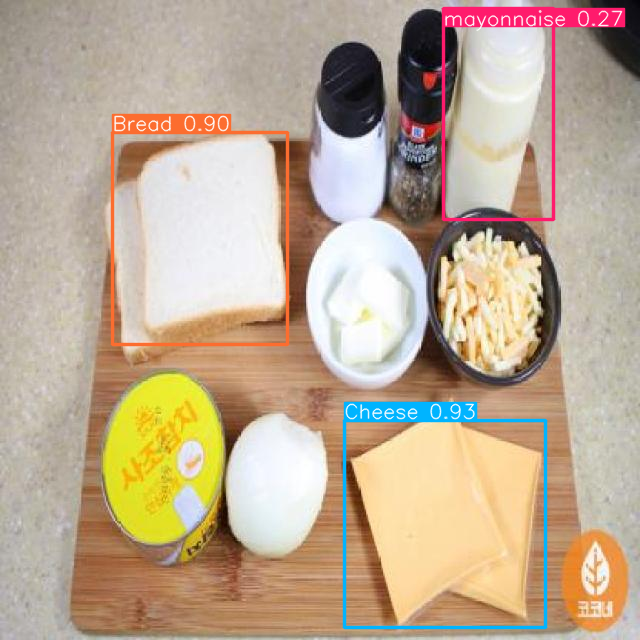

In [11]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
results=model.predict("/content/FOOD-INGREDIENTS-dataset-4/valid/images/080_PNG_jpg.rf.a6ec5686505446d60662bd0b378fa5eb.jpg")

res_plot = results[0].plot()
cv2_imshow(res_plot)